<a href="https://colab.research.google.com/github/oliviafrazier3-design/lacrosse-ai/blob/main/Lacrosse_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [ ]:
!uv pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.242 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.8/112.6 GB disk)


# Version 1

In [ ]:
from google.colab import userdata
api_key = userdata.get('ROBOFLOW_KEY')
rf = Roboflow(api_key=api_key)

In [ ]:
#version 1
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="UV1FuY4tn31HNLDFrOrj")
project = rf.workspace("lacrosse-tracking").project("lacrosse-tracking")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
#saves version 1
!yolo train model=yolo11n.pt data={dataset.location}/data.yaml epochs=50 imgsz=640

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Lacrosse-Tracking-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tr

In [ ]:
#downloads version 1
from google.colab import files

model_path = 'runs/detect/train/weights/best.pt'

files.download(model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Version 2

In [ ]:
#version 2
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="UV1FuY4tn31HNLDFrOrj")
project = rf.workspace("lacrosse-tracking").project("lacrosse-tracking")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
# This tells the AI to use your first version as a starting point
# and saves version 2
!yolo train model=/content/best.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 name=lacrosse_v2

Ultralytics 8.3.242 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Lacrosse-Tracking-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=lacrosse_v2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0

In [ ]:
#Downloads Version 2 of lacrosse AI
from google.colab import files

# This points to your NEW improved weights
model_path = 'runs/detect/lacrosse_v2/weights/best.pt'

files.download(model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

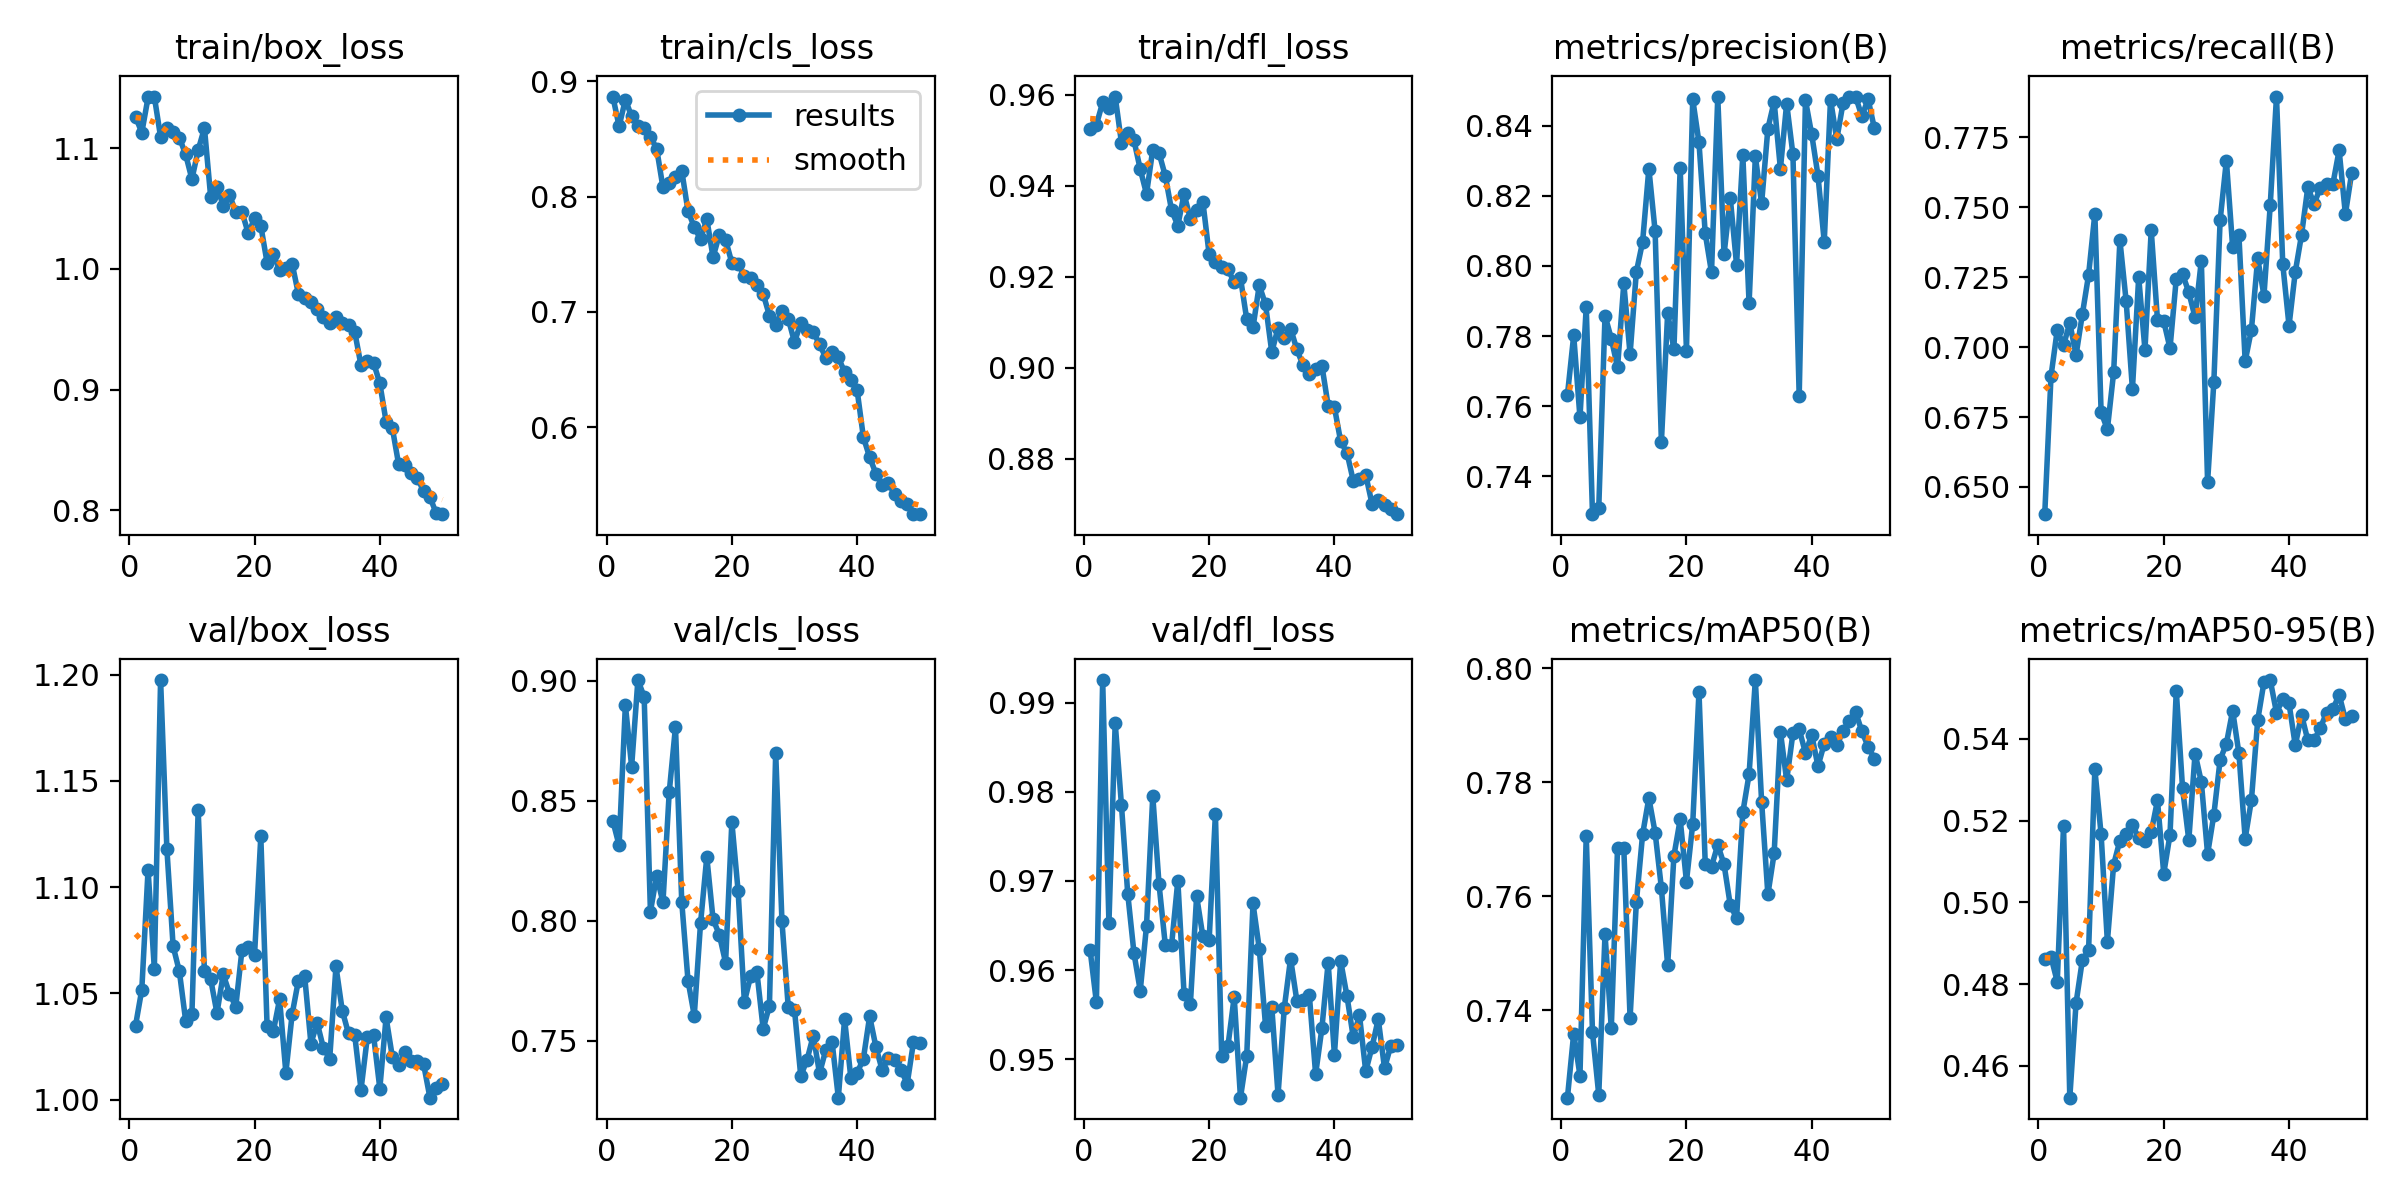

In [ ]:
#checks if version 2 is an improvement from version 1
from IPython.display import Image
# This shows the training graphs for your V2 run
Image(filename='runs/detect/lacrosse_v2/results.png', width=600)